In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from matplotlib.colors import ListedColormap
sns.set()
colors = sns.color_palette("husl")

## 预处理

### 空值处理

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
from sklearn.datasets import load_iris

In [51]:
train,target = load_iris(return_X_y = True)
data = np.concatenate((np.array([np.nan,np.nan,np.nan,np.nan]).reshape(1,4),train),axis=0)

In [21]:
# 空值处理
SimpleImputer().fit_transform(data)
# 等价于
data = pd.DataFrame(data)
data.fillna(data.mean())

,0,1,2,3
0,5.843333,3.057333,3.758,1.199333
1,5.100000,3.500000,1.400,0.200000
2,4.900000,3.000000,1.400,0.200000
3,4.700000,3.200000,1.300,0.200000
4,4.600000,3.100000,1.500,0.200000
...,...,...,...,...
146,6.700000,3.000000,5.200,2.300000
147,6.300000,2.500000,5.000,1.900000
148,6.500000,3.000000,5.200,2.000000
149,6.200000,3.400000,5.400,2.300000


### 对定量特征二值化

In [22]:
from sklearn.preprocessing import Binarizer

In [24]:
data1 = data[0]

In [25]:
data1.max(),data1.min()

(7.9, 4.3)

In [28]:
# threshold 阈值，小于这个值映射为0，大于这个值映射为1
Binarizer(threshold=6).fit_transform(train[:,[0]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

#### 数值编码

In [29]:
from sklearn.preprocessing import LabelEncoder

In [38]:
df = pd.DataFrame({
    "sex":["Male","Female","Children","Male"]
})

In [39]:
label_data = LabelEncoder().fit_transform(df["sex"])
label_data

array([2, 1, 0, 2])

#### 独热编码

In [40]:
# 用二维表格转换某一个特征，消除数据间的有序性
from sklearn.preprocessing import OneHotEncoder

In [41]:
OneHotEncoder().fit_transform(label_data.reshape(-1,1)).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [45]:
from sklearn.preprocessing import label_binarize

In [46]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
label_binarize(target,classes=[0,1,2])

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
lr = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.3,random_state=1)
lr.fit(X_train,y_train)

LogisticRegression()

In [57]:
lr.predict_proba(X_test)

array([[9.84969401e-01, 1.50305146e-02, 8.44966199e-08],
       [2.74317091e-01, 7.21958436e-01, 3.72447251e-03],
       [6.85203555e-03, 8.68227092e-01, 1.24920872e-01],
       [9.85542277e-01, 1.44574982e-02, 2.24616457e-07],
       [1.60256889e-06, 2.00022832e-02, 9.79996114e-01],
       [4.79556573e-03, 5.88115369e-01, 4.07089065e-01],
       [1.74098116e-04, 1.29820784e-01, 8.70005117e-01],
       [9.58096562e-01, 4.18999081e-02, 3.53008946e-06],
       [9.68322697e-01, 3.16764616e-02, 8.41238423e-07],
       [1.33850342e-05, 3.11567151e-02, 9.68829900e-01],
       [1.98639741e-02, 8.69055646e-01, 1.11080380e-01],
       [9.66971693e-01, 3.30269091e-02, 1.39771964e-06],
       [6.97441528e-06, 3.82948468e-02, 9.61698179e-01],
       [7.67771716e-03, 7.67233851e-01, 2.25088432e-01],
       [7.45232780e-03, 7.31223663e-01, 2.61324009e-01],
       [9.87364780e-01, 1.26350234e-02, 1.97009458e-07],
       [2.35581158e-02, 9.29626733e-01, 4.68151511e-02],
       [1.15212537e-02, 6.61654

#### 无量纲化

In [58]:
# 区间缩放法
from sklearn.preprocessing import MinMaxScaler
                                                                                                                                            

In [59]:
# 标准化(常用)
from sklearn.preprocessing import StandardScaler

In [60]:
# 归一化
from sklearn.preprocessing import Normalizer

In [66]:
# 建议一定要做标准化处理
ss = StandardScaler().fit_transform(train)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

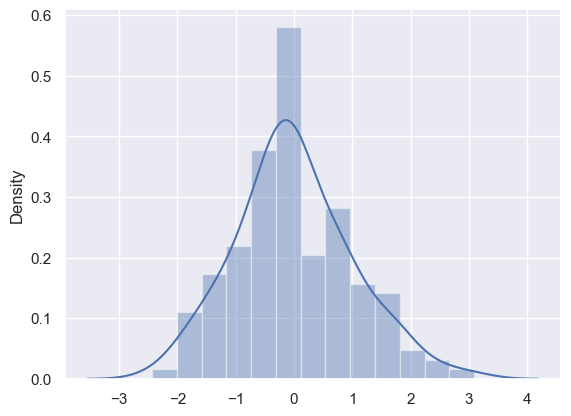

In [67]:
sns.distplot(ss[:,1])

In [68]:
MinMaxScaler().fit_transform(train)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [69]:
Normalizer().fit_transform(train)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

## 特征选择

### 特征是否发散

In [100]:
# 方差
# 方差越大，数据越离散，分类越明显
train.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

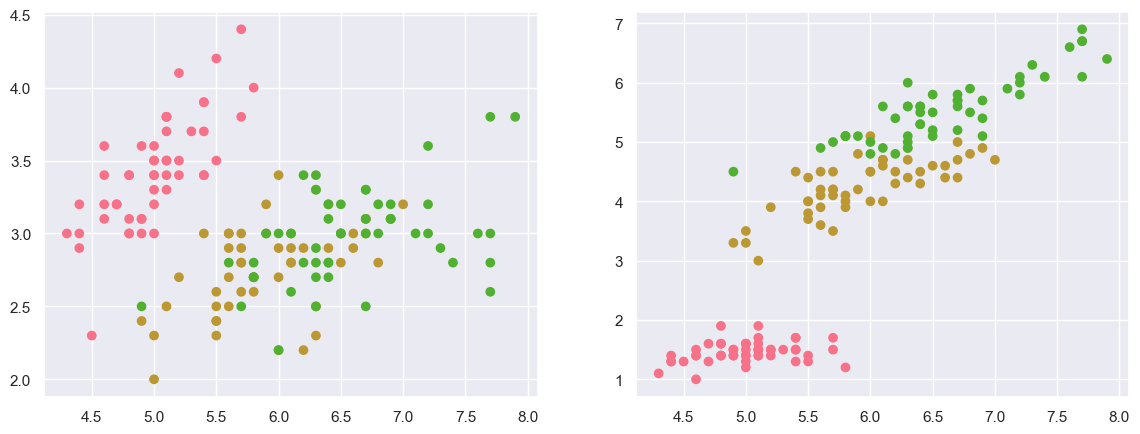

In [75]:
plt.figure(figsize=(14,5))
cm = ListedColormap(colors[:3])

plt.subplot(1,2,1)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cm)

plt.subplot(1,2,2)
plt.scatter(train[:,0],train[:,2],c=target,cmap=cm)

plt.show()

### GBDT 梯度提升决策树

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbdt = GradientBoostingClassifier()

In [79]:
gbdt.fit(train,target)

GradientBoostingClassifier()

In [80]:
# 特征重要性，建议所有模型都可以使用GBDT做特征选择
gbdt.feature_importances_

array([0.00624496, 0.01183994, 0.31929112, 0.66262398])

### 特征选择

In [81]:
from sklearn.feature_selection import SelectFromModel

In [82]:
# estimator 模型 必须要有feature_importances_或coef_属性
# threshold 重要性阈值
SelectFromModel(estimator=gbdt,threshold=0.2).fit_transform(train,target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

### 特征与目标的相关性强弱

In [97]:
iris = pd.DataFrame(data=load_iris().data)
iris.insert(loc=4,column="4",value=load_iris().target)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [98]:
# 查看特征之间的相关性
iris.corr()

,0,1,2,3,4
0,1.000000,-0.117570,0.871754,0.817941,0.782561
1,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
2,0.871754,-0.428440,1.000000,0.962865,0.949035
3,0.817941,-0.366126,0.962865,1.000000,0.956547
4,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

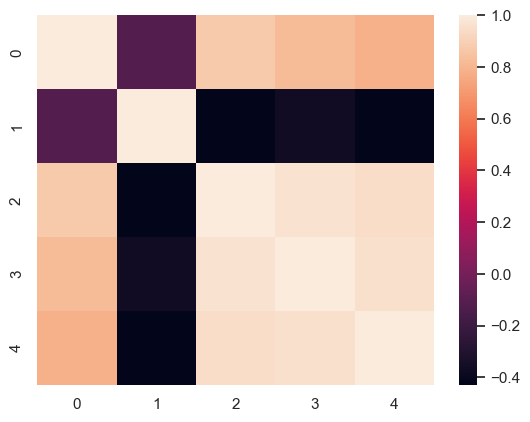

In [99]:
sns.heatmap(iris.corr())

### 降维

In [ ]:
# 降维后的都是新特征
# 目的：减少数据集的特征，进而降低算法的复杂度，降噪给算法带来更多收益

#### 线性判别分析

In [101]:
# 考虑标签项，有监督学习
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [110]:
# n_components 保留的个数
lda = LinearDiscriminantAnalysis(n_components=2)
lda_train = lda.fit_transform(train,target)
cross_val_score(lr,lda_train,target,cv=5).mean()

0.9800000000000001

#### 主成分分析

In [102]:
from sklearn.decomposition import PCA

In [106]:
# n_components
# int    保留的个数
# float  保留的比值
pca_train = PCA(n_components=2).fit_transform(train)
cross_val_score(lr,pca_train,target,cv=5).mean()

## 模型评价